<a href="https://colab.research.google.com/github/javilledo/machine-learning/blob/master/notebooks/t02_03_data_cleaning_agrupacion_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AGREGACIÓN DE DATOS POR CATEGORÍA

In [1]:
import numpy as np
import pandas as pd

In [2]:
gender = ['Male', 'Female']
economic_status = ['Poor', 'Middle Class', 'Rich']

In [3]:
n = 500

gender_data = []
economic_status_data = []

for i in range(0,n):
  gender_data.append(np.random.choice(gender))
  economic_status_data.append(np.random.choice(economic_status))

In [4]:
gender_data[1:10]

['Male',
 'Female',
 'Female',
 'Male',
 'Male',
 'Male',
 'Female',
 'Female',
 'Male']

In [5]:
economic_status_data[1:10]

['Rich',
 'Middle Class',
 'Poor',
 'Poor',
 'Poor',
 'Rich',
 'Poor',
 'Poor',
 'Poor']

In [6]:
# N(m,s) = m + s * N(0,1)
height_data = 160 + 30 * np.random.randn(n)
weight_data = 65 + 25 * np.random.randn(n)
age_data = 30 + 12 * np.random.randn(n)
income_data = 18000 + 3500 * np.random.randn(n)

In [7]:
data = pd.DataFrame(
    {
        'Gender': gender_data,
        'Economic Status': economic_status_data,
        'Height': height_data,
        'Weight': weight_data,
        'Age': age_data,
        'Income': income_data      
    }
)
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,175.006344,67.379187,33.629881,22308.749355
1,Male,Rich,170.652935,106.328351,28.320310,16606.235651
2,Female,Middle Class,134.347439,68.949271,11.464037,26113.687063
3,Female,Poor,154.356081,70.782271,18.828495,19947.094631
4,Male,Poor,124.364467,14.672607,31.837081,15469.219067


In [8]:
data['Age'] = [int(x) for x in data['Age']] #transformamos edad a entero
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,175.006344,67.379187,33,22308.749355
1,Male,Rich,170.652935,106.328351,28,16606.235651
2,Female,Middle Class,134.347439,68.949271,11,26113.687063
3,Female,Poor,154.356081,70.782271,18,19947.094631
4,Male,Poor,124.364467,14.672607,31,15469.219067


# AGRUPACIÓN DE DATOS

In [9]:
grouped_gender = data.groupby('Gender')

In [10]:
grouped_gender.groups

{'Female': Int64Index([  2,   3,   7,   8,  10,  11,  16,  17,  20,  21,
             ...
             483, 484, 486, 487, 491, 493, 494, 495, 496, 499],
            dtype='int64', length=260),
 'Male': Int64Index([  0,   1,   4,   5,   6,   9,  12,  13,  14,  15,
             ...
             475, 476, 482, 485, 488, 489, 490, 492, 497, 498],
            dtype='int64', length=240)}

In [11]:
grouped_gender.groups['Female']

Int64Index([  2,   3,   7,   8,  10,  11,  16,  17,  20,  21,
            ...
            483, 484, 486, 487, 491, 493, 494, 495, 496, 499],
           dtype='int64', length=260)

In [12]:
grouped_gender.groups['Female'].values

array([  2,   3,   7,   8,  10,  11,  16,  17,  20,  21,  22,  24,  26,
        27,  29,  30,  32,  33,  35,  37,  38,  41,  42,  43,  44,  45,
        46,  51,  52,  55,  57,  59,  60,  61,  62,  63,  64,  65,  67,
        69,  70,  73,  77,  78,  79,  80,  84,  85,  90,  91,  92,  93,
        94,  97, 100, 101, 102, 103, 105, 107, 109, 110, 111, 112, 116,
       117, 118, 123, 127, 128, 129, 130, 131, 133, 135, 138, 139, 140,
       142, 143, 144, 147, 150, 151, 152, 154, 155, 156, 158, 164, 167,
       171, 173, 179, 181, 182, 183, 188, 189, 190, 191, 192, 194, 196,
       199, 201, 202, 209, 210, 211, 213, 214, 216, 217, 218, 219, 221,
       222, 224, 225, 226, 229, 230, 240, 242, 243, 246, 251, 252, 254,
       255, 256, 257, 258, 259, 260, 262, 263, 268, 270, 271, 275, 276,
       278, 280, 283, 285, 286, 287, 290, 291, 294, 295, 297, 298, 302,
       304, 305, 307, 308, 310, 315, 321, 322, 323, 324, 325, 327, 330,
       331, 332, 333, 335, 339, 341, 345, 348, 349, 351, 354, 35

In [13]:
for names, groups in grouped_gender:
  print(names)
  print(groups)

Female
     Gender Economic Status      Height     Weight  Age        Income
2    Female    Middle Class  134.347439  68.949271   11  26113.687063
3    Female            Poor  154.356081  70.782271   18  19947.094631
7    Female            Poor  117.141118  17.719737   35  17755.747383
8    Female            Poor  142.115343  59.554666   26  18107.612670
10   Female            Rich  225.083736  40.347690   28  13620.977952
..      ...             ...         ...        ...  ...           ...
493  Female            Poor  166.318753  72.372459   30  21006.975893
494  Female            Rich   96.335310  54.164186   39   9859.219912
495  Female            Poor  172.702789  45.798646    8  15751.004559
496  Female            Rich  124.281336  52.131240   47  25024.842223
499  Female            Poor  135.054316  42.350813   21  18404.629378

[260 rows x 6 columns]
Male
    Gender Economic Status      Height      Weight  Age        Income
0     Male    Middle Class  175.006344   67.379187   3

In [14]:
grouped_gender.get_group('Female')

,Gender,Economic Status,Height,Weight,Age,Income
2,Female,Middle Class,134.347439,68.949271,11,26113.687063
3,Female,Poor,154.356081,70.782271,18,19947.094631
7,Female,Poor,117.141118,17.719737,35,17755.747383
8,Female,Poor,142.115343,59.554666,26,18107.612670
10,Female,Rich,225.083736,40.347690,28,13620.977952
...,...,...,...,...,...,...
493,Female,Poor,166.318753,72.372459,30,21006.975893
494,Female,Rich,96.335310,54.164186,39,9859.219912
495,Female,Poor,172.702789,45.798646,8,15751.004559
496,Female,Rich,124.281336,52.131240,47,25024.842223


In [15]:
data.groupby('Economic Status').get_group('Poor')

,Gender,Economic Status,Height,Weight,Age,Income
3,Female,Poor,154.356081,70.782271,18,19947.094631
4,Male,Poor,124.364467,14.672607,31,15469.219067
5,Male,Poor,133.243049,65.343582,49,17000.128706
7,Female,Poor,117.141118,17.719737,35,17755.747383
8,Female,Poor,142.115343,59.554666,26,18107.612670
...,...,...,...,...,...,...
491,Female,Poor,158.255507,73.897300,36,20441.936282
492,Male,Poor,150.209927,76.463181,32,15857.354036
493,Female,Poor,166.318753,72.372459,30,21006.975893
495,Female,Poor,172.702789,45.798646,8,15751.004559


In [16]:
double_group = data.groupby(['Gender', 'Economic Status'])

In [17]:
len(double_group)

6

In [18]:
for names, groups in double_group:
  print(names)
  print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight  Age        Income
2    Female    Middle Class  134.347439   68.949271   11  26113.687063
11   Female    Middle Class  161.198700   59.051519   43  18747.408982
21   Female    Middle Class  113.005597   44.962755   14  23288.983267
22   Female    Middle Class  174.530405   87.765059   48  23945.839967
30   Female    Middle Class  144.802640  127.523057   24  21651.376704
..      ...             ...         ...         ...  ...           ...
474  Female    Middle Class  196.204012   67.581218   22  14951.233491
477  Female    Middle Class  169.312570   47.347564   39  18619.705911
481  Female    Middle Class  170.714508   57.221955   24  22105.852908
483  Female    Middle Class  195.859297   40.610479   40  20648.388039
486  Female    Middle Class  174.958642   84.409089   40  21451.509886

[85 rows x 6 columns]
('Female', 'Poor')
     Gender Economic Status      Height     Weight  Age        Income
3    Fema

In [19]:
double_group.get_group(('Male', 'Rich'))

,Gender,Economic Status,Height,Weight,Age,Income
1,Male,Rich,170.652935,106.328351,28,16606.235651
6,Male,Rich,187.816326,78.649300,8,16141.416081
13,Male,Rich,171.364769,84.050951,58,18161.696378
23,Male,Rich,164.474998,30.730426,28,18942.189614
34,Male,Rich,140.538155,47.941683,22,21898.205789
...,...,...,...,...,...,...
462,Male,Rich,200.877392,61.141613,12,17360.421008
464,Male,Rich,202.258320,95.841971,40,21136.167536
466,Male,Rich,201.550001,80.161087,56,15907.991798
475,Male,Rich,158.099339,84.660205,36,15520.276991


## OPERACIONES SOBRE DATOS AGRUPADOS

In [20]:
double_group.sum()

Height       Weight   Age        Income
Gender Economic Status                                               
Female Middle Class     13253.854089  5559.910303  2595  1.603508e+06
       Poor             13381.710913  5144.875362  2412  1.503377e+06
       Rich             14943.216326  5709.751810  2614  1.681072e+06
Male   Middle Class     13797.521028  5640.066339  2556  1.581225e+06
       Poor             11833.749960  4990.738694  2189  1.306640e+06
       Rich             12673.173300  5453.565891  2505  1.441045e+06

In [21]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     155.927695  65.410709  30.529412  18864.794712
       Poor             161.225433  61.986450  29.060241  18112.978570
       Rich             162.426264  62.062520  28.413043  18272.519174
Male   Middle Class     160.436291  65.582167  29.720930  18386.334163
       Poor             159.915540  67.442415  29.581081  17657.299210
       Rich             158.414666  68.169574  31.312500  18013.060286

In [22]:
double_group.size()

Gender  Economic Status
Female  Middle Class       85
        Poor               83
        Rich               92
Male    Middle Class       86
        Poor               74
        Rich               80
dtype: int64

In [23]:
double_group.describe()

Height              ...        Income              
                        count        mean  ...           75%           max
Gender Economic Status                     ...                            
Female Middle Class      85.0  155.927695  ...  21187.058530  27066.212839
       Poor              83.0  161.225433  ...  20064.995074  26129.851971
       Rich              92.0  162.426264  ...  20544.413230  26567.930247
Male   Middle Class      86.0  160.436291  ...  20058.612858  29805.345359
       Poor              74.0  159.915540  ...  19442.444598  27823.101881
       Rich              80.0  158.414666  ...  20273.162550  26248.704928

[6 rows x 32 columns]

In [26]:
grouped_income = double_group['Income']
grouped_income.describe()

count          mean  ...           75%           max
Gender Economic Status                       ...                            
Female Middle Class      85.0  18864.794712  ...  21187.058530  27066.212839
       Poor              83.0  18112.978570  ...  20064.995074  26129.851971
       Rich              92.0  18272.519174  ...  20544.413230  26567.930247
Male   Middle Class      86.0  18386.334163  ...  20058.612858  29805.345359
       Poor              74.0  17657.299210  ...  19442.444598  27823.101881
       Rich              80.0  18013.060286  ...  20273.162550  26248.704928

[6 rows x 8 columns]

In [27]:
# con agregate se puede hacer un describe todo lo personalizado que queramos
double_group.aggregate(
    {
        'Income': np.sum,
        'Age': np.mean,
        'Height': np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.603508e+06  30.529412  32.918788
       Poor             1.503377e+06  29.060241  28.544196
       Rich             1.681072e+06  28.413043  28.493572
Male   Middle Class     1.581225e+06  29.720930  32.284705
       Poor             1.306640e+06  29.581081  37.223936
       Rich             1.441045e+06  31.312500  26.730864

In [38]:
# En lugar de aplicar unas funciones ya existentes, podemos aplicar alguna personalizada que hayamos definido
# podemos hacerlo con una función lambda si solo vamos a hacerlo una vez
double_group.aggregate(
    {
        'Age': np.mean,
        'Height': lambda h: np.mean(h) / np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     30.529412  4.764850
       Poor             29.060241  5.682610
       Rich             28.413043  5.731689
Male   Middle Class     29.720930  4.998567
       Poor             29.581081  4.325365
       Rich             31.312500  5.963673

In [30]:
double_group.aggregate([np.sum, np.mean, np.std])

Height              ...        Income             
                                 sum        mean  ...          mean          std
Gender Economic Status                            ...                           
Female Middle Class     13253.854089  155.927695  ...  18864.794712  3471.559778
       Poor             13381.710913  161.225433  ...  18112.978570  3429.276058
       Rich             14943.216326  162.426264  ...  18272.519174  3228.227169
Male   Middle Class     13797.521028  160.436291  ...  18386.334163  3199.038827
       Poor             11833.749960  159.915540  ...  17657.299210  3154.806746
       Rich             12673.173300  158.414666  ...  18013.060286  3106.007644

[6 rows x 12 columns]

In [31]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age    Income
                        <lambda>  <lambda>  <lambda>  <lambda>
Gender Economic Status                                        
Female Middle Class     4.764850  2.593522  2.596714  5.466348
       Poor             5.682610  2.728343  2.594517  5.313975
       Rich             5.731689  2.524375  2.342922  5.691249
Male   Middle Class     4.998567  2.562320  2.815490  5.781165
       Poor             4.325365  2.713895  2.535548  5.635156
       Rich             5.963673  2.754404  2.428750  5.836015

# FILTRADO DE DATOS

In [37]:
double_group['Age'].filter(lambda x: x.sum()> 2400)

0      33
1      28
2      11
3      18
6       8
       ..
495     8
496    47
497    37
498     9
499    21
Name: Age, Length: 426, dtype: int64

#TRANSFORMACIÓN DE VARIABLES

In [42]:
zscore = lambda x: (x - x.mean()) / x.std() #tipificación a N(0,1)

In [45]:
z_group = double_group.transform(zscore)
z_group

,Height,Weight,Age,Income
0,0.451299,0.069801,0.308818,1.226123
1,0.457833,1.532146,-0.255323,-0.452937
2,-0.655560,0.139476,-1.651297,2.088079
3,-0.240657,0.384810,-0.981499,0.534841
4,-0.955059,-2.109070,0.120798,-0.693570
...,...,...,...,...
495,0.402091,-0.708203,-1.868911,-0.688768
496,-1.338721,-0.401750,1.524317,2.091651
497,0.870123,-1.124999,0.438384,0.234485
498,-0.134910,-1.977820,-1.951467,2.002052


(array([  3.,  28.,  58.,  82., 110., 111.,  70.,  24.,   9.,   5.]),
 array([-2.7563229 , -2.16386051, -1.57139811, -0.97893572, -0.38647332,
         0.20598907,  0.79845147,  1.39091386,  1.98337626,  2.57583865,
         3.16830104]),
 <a list of 10 Patch objects>)

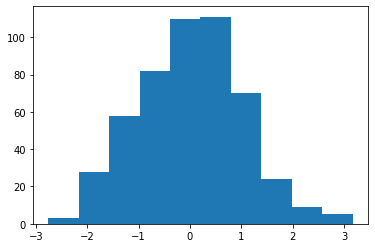

In [47]:
import matplotlib.pyplot as plt
plt.hist(z_group['Age'])

In [48]:
fill_na_mean = lambda x: x.fillna(x.mean())

In [49]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,175.006344,67.379187,33,22308.749355
1,170.652935,106.328351,28,16606.235651
2,134.347439,68.949271,11,26113.687063
3,154.356081,70.782271,18,19947.094631
4,124.364467,14.672607,31,15469.219067
...,...,...,...,...
495,172.702789,45.798646,8,15751.004559
496,124.281336,52.131240,47,25024.842223
497,181.673802,40.150976,37,18741.372648
498,156.080765,14.663293,9,24790.976299


#OPERACIONES DIVERSAS MUY ÚTILES

In [50]:
# seleccionar la fila i-ésima
double_group.head(1) #ojo que al ser una agrupación, devuelve la primera fila de cada uno

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Middle Class,175.006344,67.379187,33,22308.749355
1,Male,Rich,170.652935,106.328351,28,16606.235651
2,Female,Middle Class,134.347439,68.949271,11,26113.687063
3,Female,Poor,154.356081,70.782271,18,19947.094631
4,Male,Poor,124.364467,14.672607,31,15469.219067
10,Female,Rich,225.083736,40.347690,28,13620.977952


In [52]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
486,Female,Middle Class,174.958642,84.409089,40,21451.509886
492,Male,Poor,150.209927,76.463181,32,15857.354036
496,Female,Rich,124.281336,52.131240,47,25024.842223
497,Male,Rich,181.673802,40.150976,37,18741.372648
498,Male,Middle Class,156.080765,14.663293,9,24790.976299
499,Female,Poor,135.054316,42.350813,21,18404.629378


In [53]:
double_group.nth(32) #el elemento 32

Height     Weight  Age        Income
Gender Economic Status                                          
Female Middle Class     111.299372  82.913111   68  18581.965850
       Poor              96.950135  70.225045   11  21472.829988
       Rich             112.850882  64.573342   55  16486.442072
Male   Middle Class     196.915571  85.274409   39  19101.403902
       Poor             162.451057  36.646705   11  19019.816089
       Rich             121.758437  65.359832   43  17885.708028

In [55]:
double_group.nth(82) #si en algunos grupos no hay tantos registros...

Height     Weight  Age        Income
Gender Economic Status                                          
Female Middle Class     170.714508  57.221955   24  22105.852908
       Poor             135.054316  42.350813   21  18404.629378
       Rich             171.657528  88.276593    6  20763.911010
Male   Middle Class     139.571730  81.750265   16  17758.174060

In [58]:
data_sorted = data.sort_values(['Age', 'Income'])
data_sorted.head()

,Gender,Economic Status,Height,Weight,Age,Income
252,Female,Poor,180.265415,76.920424,-2,16950.046878
345,Female,Rich,202.183314,48.368184,0,18643.950160
282,Male,Poor,163.897261,25.528493,2,12651.518071
408,Female,Rich,171.391471,59.459688,4,16637.370486
15,Male,Poor,179.479848,104.366568,6,15823.816365


In [63]:
age_grouped = data_sorted.groupby('Gender')
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
252,Female,Poor,180.265415,76.920424,-2,16950.046878
282,Male,Poor,163.897261,25.528493,2,12651.518071


In [62]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
66,Male,Rich,130.374132,69.886963,65,19262.974747
209,Female,Middle Class,111.299372,82.913111,68,18581.965850


In [ ]:
#from sklearn.model_selection import train_test_split en lugar de from sklearn.cross_validation import train_test_split

# es necesario usar .astype(int) al representar el vector de variables booleanas 